In [1]:
## Notebook env: seuratdisk (R kernel)
## this notebook spits out the input mtx 

In [2]:
library(SeuratDisk)
library(Seurat)
library(Matrix)
library(ggplot2)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching SeuratObject

Attaching sp



In [3]:
tRF_seurat = LoadH5Seurat('/home/ssobti/projects/mir_tud/010523_filtered_data/tRF.integrated.qc_norm_scaled.dimred.clustered.gex.guide_assigned.h5seurat')

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding miscellaneous information for RNA

Initializing integrated with data

Adding scale.data for integrated

Adding variable feature information for integrated

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding graph integrated_nn

Adding graph integrated_snn

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results

Adding data that was not associated with an assay

Warning message:
“Adding a command log without an assay associated with it”


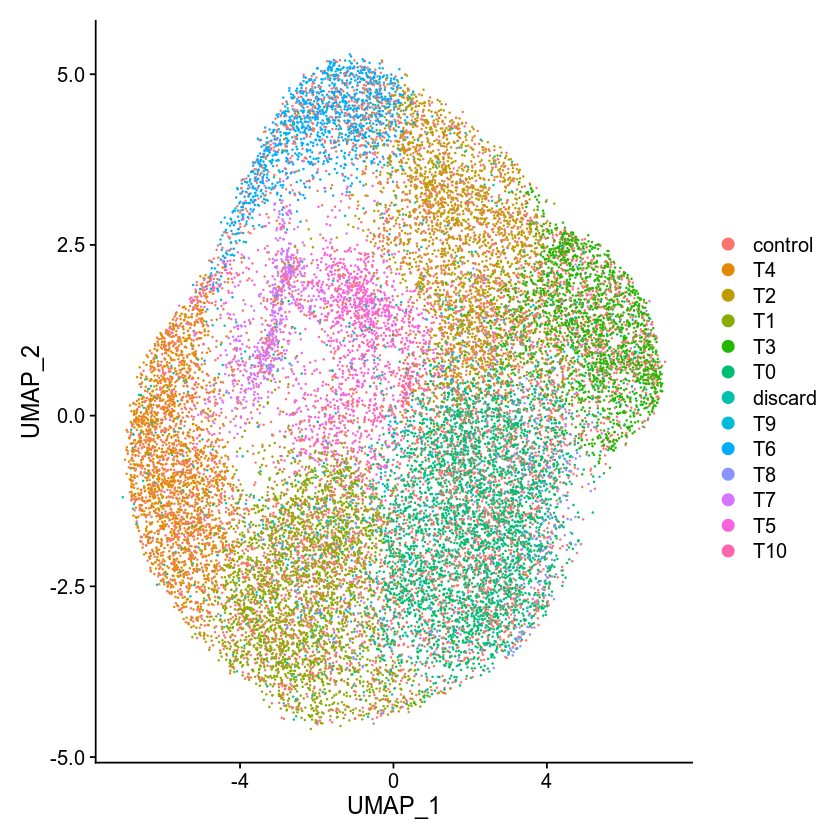

In [4]:
DimPlot(tRF_seurat)

In [5]:
normalized_data = tRF_seurat@assays$RNA@data
gene_names = rownames(normalized_data)

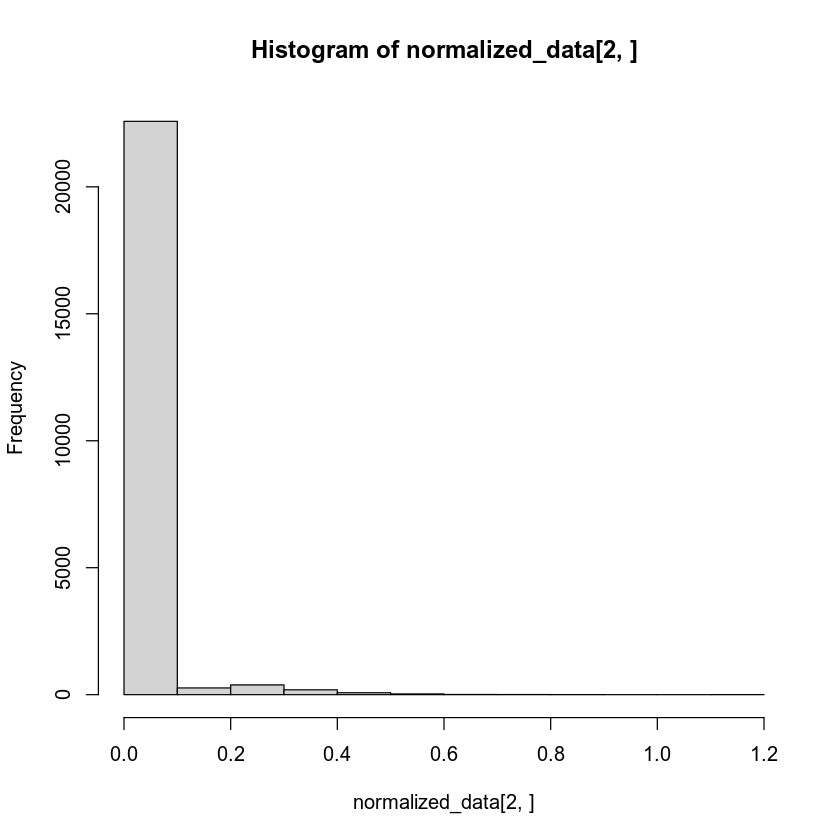

In [6]:
hist(normalized_data[2,])

In [7]:
meta = tRF_seurat@meta.data

In [8]:
head(meta)

,nCount_RNA,nFeature_RNA,orig.ident,sample,barcode,guide,lor,pvalue,adj_pvalue,max_umi,n_umi,m_umi,v_umi,log_max_umi,log_n_umi,log_m_umi,percent.mt,integrated_snn_res.0.5,seurat_clusters,guide_group
,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>
tRF_1:AAACCCAAGGCCTTGC-1,20239,5372,tRF,tRF_1,AAACCCAAGGCCTTGC,TuD_NC_01,2.144148,1.652448e-15,8.377661e-09,23,33,0.1506849,2.458841,1.361728,1.518514,-0.82193017,6.363951,3,control,control
tRF_1:AAACCCACATATACCG-1,35201,7086,tRF,tRF_1,AAACCCACATATACCG,tRF_Arg_ACG_2,7.473168,2.865581e-322,1.452806e-315,182,214,0.9771689,151.260944,2.260071,2.330414,-0.01003034,6.295276,4,T4,target
tRF_1:AAACCCACATGACAGG-1,32207,6695,tRF,tRF_1,AAACCCACATGACAGG,TuD_NC_01,2.336330,3.615579e-22,1.833044e-15,36,53,0.2420091,5.973273,1.556303,1.724276,-0.61616825,6.237774,1,control,control
tRF_1:AAACCCACATGACGGA-1,38017,7151,tRF,tRF_1,AAACCCACATGACGGA,tRF_Arg_ACG_2,1.160519,2.865581e-322,1.452806e-315,214,372,1.6986301,237.780319,2.330414,2.570543,0.23009883,6.831154,4,T4,target
tRF_1:AAACCCAGTCAACCAT-1,28633,6505,tRF,tRF_1,AAACCCAGTCAACCAT,TuD_NC_01,3.011825,9.624496e-26,4.879475e-19,38,51,0.2328767,6.638180,1.579784,1.707570,-0.63287394,8.619425,3,control,control
tRF_1:AAACCCAGTTATCTTC-1,28000,6688,tRF,tRF_1,AAACCCAGTTATCTTC,tRF_Glu_CTC_2,4.656560,7.086097e-135,3.592545e-128,69,88,0.4018265,21.984584,1.838849,1.944483,-0.39596144,6.617857,2,T2,target


In [9]:
guide_vector = meta$guide

In [10]:
guide_vector[startsWith(guide_vector, "TuD_NC")] = 'TuD_NC'

In [11]:
guide_vector[1:5]

[1] "TuD_NC"        "tRF_Arg_ACG_2" "TuD_NC"        "tRF_Arg_ACG_2"
[5] "TuD_NC"

In [12]:
meta$guide = guide_vector

In [13]:
Matrix::writeMM(normalized_data, '/home/ssobti/projects/mir_tud/010523_filtered_data/tRF_normalized_data.mtx')

NULL

In [14]:
write.csv(gene_names, '/home/ssobti/projects/mir_tud/010523_filtered_data/tRF_gene_names.csv')
write.csv(meta, '/home/ssobti/projects/mir_tud/010523_filtered_data/tRF_meta.csv')

In [15]:
tRF_seurat <- FindVariableFeatures(miR_seurat, selection.method = "vst", nfeatures = 2000)

ERROR: Error in FindVariableFeatures(miR_seurat, selection.method = "vst", nfeatures = 2000): object 'miR_seurat' not found


In [16]:
VariableFeaturePlot(miR_seurat) -> plot1
top10 <- head(VariableFeatures(tRF_seurat), 10)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

ERROR: Error in HVFInfo(object = object, assay = assay, selection.method = selection.method, : object 'miR_seurat' not found


In [17]:
top_variable_genes = VariableFeatures(tRF_seurat)

In [18]:
write.csv(top_variable_genes, file = '/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/tRFs/top_var_genes_tRF.csv')

In [19]:
class(normalized_data)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

In [20]:
normalized_data = as(normalized_data, 'dgCMatrix')

In [21]:
medians = sparseMatrixStats::rowMedians(normalized_data)

In [22]:
median_df = data.frame(gene_medians = medians)

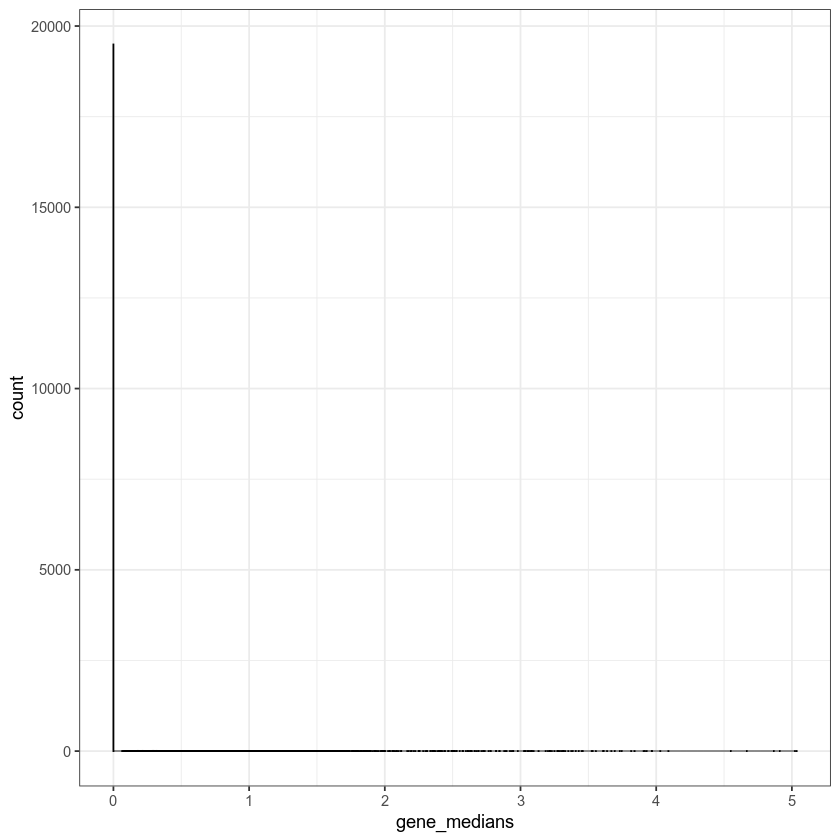

In [23]:
ggplot(median_df, aes(x=gene_medians)) + 
  geom_histogram(color="black", fill="white", bins = 50000) +
  theme_bw()

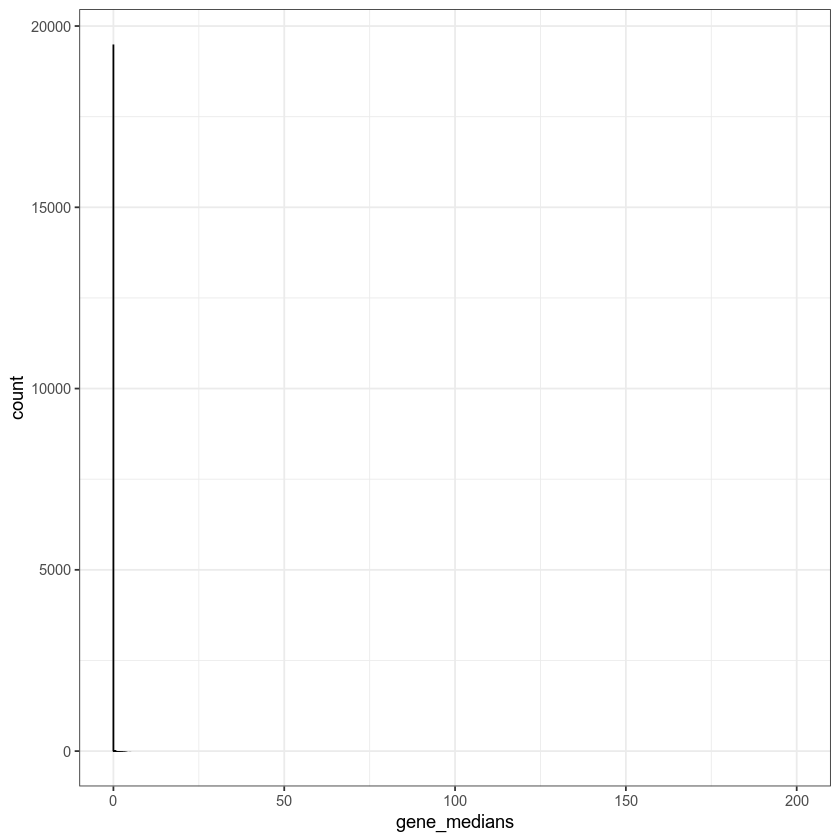

In [24]:
ggplot(median_df, aes(x=gene_medians)) + 
  geom_histogram(color="black", fill="white", bins = 50000) +
  coord_cartesian(xlim = c(0,200)) +
  theme_bw()

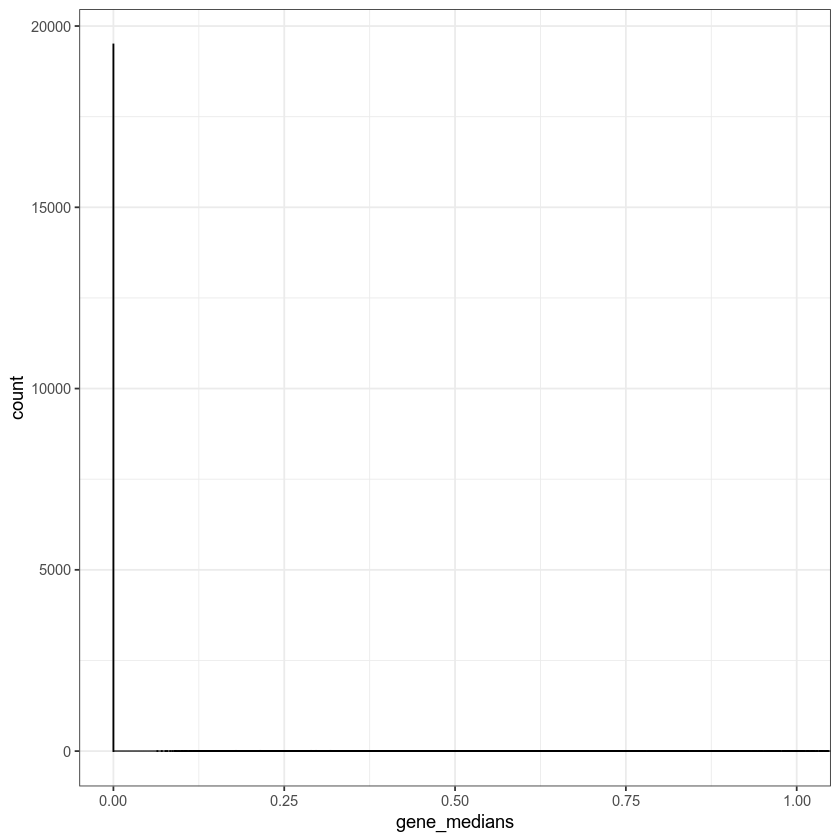

In [25]:
ggplot(median_df, aes(x=gene_medians)) + 
  geom_histogram(color="black", fill="white", bins = 50000) +
  coord_cartesian(xlim = c(0,1)) +
  theme_bw()

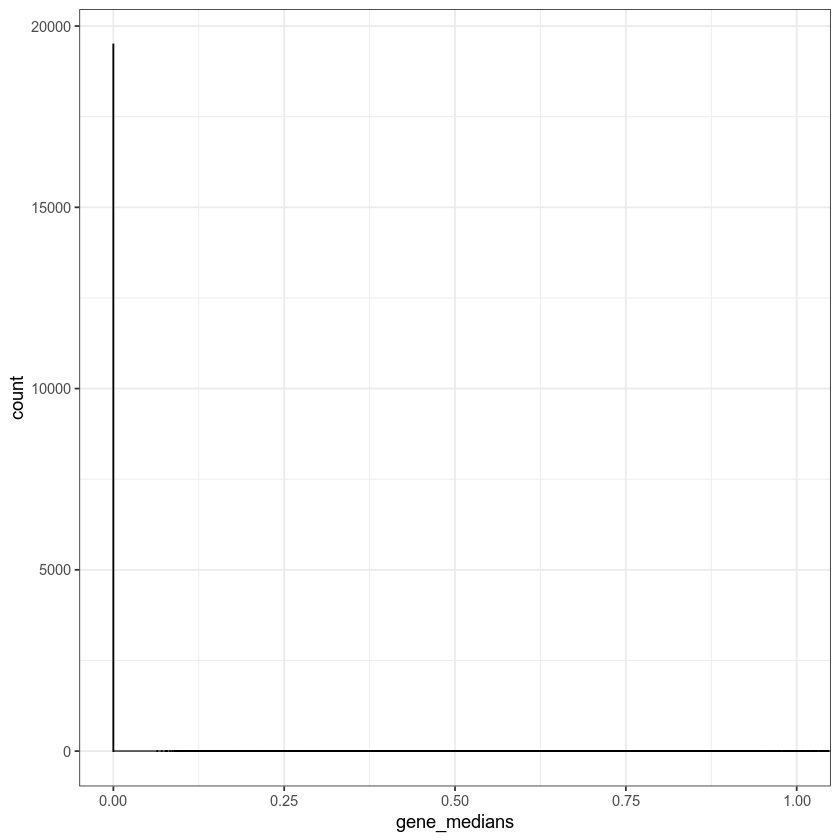

In [26]:
ggplot(median_df, aes(x=gene_medians)) + 
  geom_histogram(color="black", fill="white", bins = 50000) +
  coord_cartesian(xlim = c(0.0001,1)) +
  theme_bw()